Getting data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
confirmed=pd.read_csv("/content/confirmedodisha.csv")
deceased=pd.read_csv("/content/deceasedodisha.csv")


Columns of confirmed datset

In [ ]:
confirmed.columns

Index(['Date', 'Date_YMD', 'Status', 'OR', 'Cumulative'], dtype='object')

Columns of deceased dataset

In [ ]:
deceased.columns

Index(['Date', 'Date_YMD', 'Status', 'OR', 'Cumulative'], dtype='object')

Total confirmed cases(cumulative) v/s days(time, date_YMD)

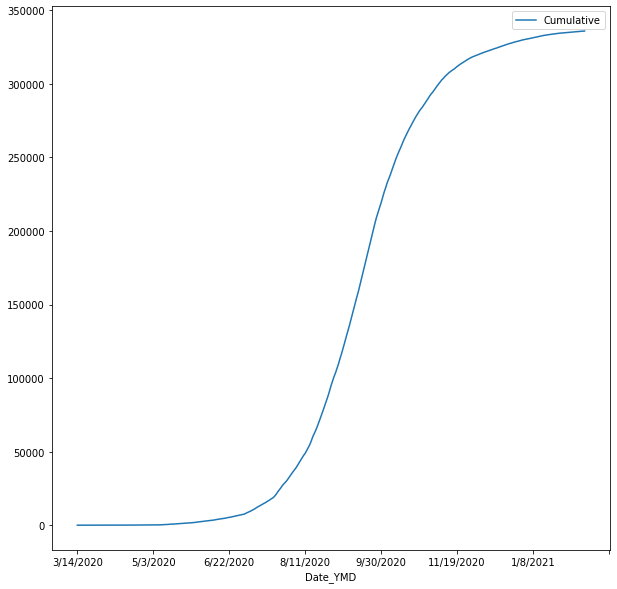

In [ ]:
confirmed.plot( x='Date_YMD', y='Cumulative', kind='line', figsize=(10,10))

Total deceased cases(cumulative) v/s time(Date_YMD)

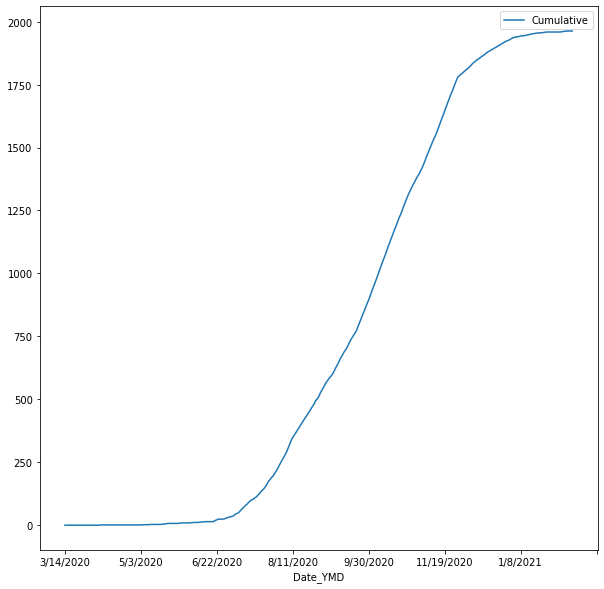

In [ ]:
deceased.plot( x='Date_YMD', y='Cumulative', kind='line', figsize=(10,10))

Retrieving first digits of total confirmed and deceased cases

In [ ]:
confirmed['first_digit']=confirmed.Cumulative.astype(str).str[:1]
deceased['first_digit']=deceased.Cumulative.astype(str).str[:1]

In [ ]:
confirmed.columns

Index(['Date', 'Date_YMD', 'Status', 'OR', 'Cumulative', 'first_digit'], dtype='object')

In [ ]:
deceased.columns

Index(['Date', 'Date_YMD', 'Status', 'OR', 'Cumulative', 'first_digit'], dtype='object')

In [ ]:
confirmed

,Date,Date_YMD,Status,OR,Cumulative,first_digit
0,14-Mar-20,3/14/2020,Confirmed,0,0,0
1,15-Mar-20,3/15/2020,Confirmed,0,0,0
2,16-Mar-20,3/16/2020,Confirmed,1,1,1
3,17-Mar-20,3/17/2020,Confirmed,0,1,1
4,18-Mar-20,3/18/2020,Confirmed,1,2,2
...,...,...,...,...,...,...
330,7-Feb-21,2/7/2021,Confirmed,72,335620,3
331,8-Feb-21,2/8/2021,Confirmed,72,335692,3
332,9-Feb-21,2/9/2021,Confirmed,105,335797,3
333,10-Feb-21,2/10/2021,Confirmed,92,335889,3


In [ ]:
deceased

,Date,Date_YMD,Status,OR,Cumulative,first_digit
0,14-Mar-20,3/14/2020,Deceased,0,0,0
1,15-Mar-20,3/15/2020,Deceased,0,0,0
2,16-Mar-20,3/16/2020,Deceased,0,0,0
3,17-Mar-20,3/17/2020,Deceased,0,0,0
4,18-Mar-20,3/18/2020,Deceased,0,0,0
...,...,...,...,...,...,...
330,7-Feb-21,2/7/2021,Deceased,0,1962,1
331,8-Feb-21,2/8/2021,Deceased,1,1963,1
332,9-Feb-21,2/9/2021,Deceased,0,1963,1
333,10-Feb-21,2/10/2021,Deceased,0,1963,1


Counting frequency of digits.

In [ ]:
confirmed_digit_count=confirmed.first_digit.value_counts()
confirmed_digit_count

3    118
2     71
1     67
4     19
5     16
6     15
7     11
8      9
9      7
0      2
Name: first_digit, dtype: int64

In [ ]:
118+71+67+19+16+15+11+9+7+2

335

Creating new dataset to check Benford's Law and plotting percentage of digits(frequency) and Benford's Percentage.

In [ ]:
confirmed_benford = [[1,67,confirmed_digit_count[2]/335*100,30.1], [2,71,confirmed_digit_count[1]/335*100,17.6]] 
confirmed_benford_df = pd.DataFrame(confirmed_benford, columns = ['First_Digit','Frequency','Percentage','Benford']) 
confirmed_benford_df

,First_Digit,Frequency,Percentage,Benford
0,1,67,20.00000,30.1
1,2,71,21.19403,17.6


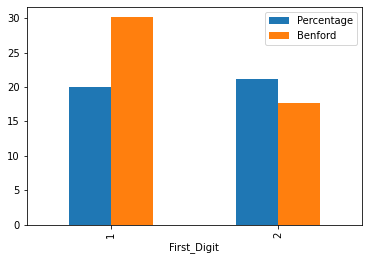

In [ ]:
confirmed_benford_df.plot(x="First_Digit", y=["Percentage", "Benford"], kind="bar")

In [ ]:
deceased_digit_count=deceased.first_digit.value_counts()
deceased_digit_count

1    188
0     24
3     22
2     20
7     18
9     15
4     15
5     13
6     12
8      8
Name: first_digit, dtype: int64

In [ ]:
deceased_benford = [[1,188,deceased_digit_count[0]/335*100,30.1], [2,20,deceased_digit_count[1]/335*100,17.6]] 
deceased_benford_df = pd.DataFrame(deceased_benford, columns = ['First_Digit','Frequency','Percentage','Benford']) 
deceased_benford_df

,First_Digit,Frequency,Percentage,Benford
0,1,188,56.119403,30.1
1,2,20,7.164179,17.6


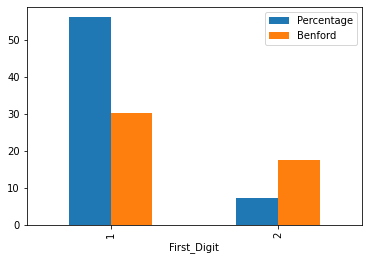

In [ ]:
deceased_benford_df.plot(x="First_Digit", y=["Percentage", "Benford"], kind="bar")